### 1. Given the function $ f(x) = -x^{4} + 2x^{3} + 2x^{2} - x $ and it's derivative $f'(x) = {- 4 x^3 + 6 x^2 + 4 x - 1}$

In [1]:
# Standard import and functions
# Run this cell first
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return -np.power(x, 4) + 2 * np.power(x, 3) + 2 * np.power(x, 2) - x

def df(x):
    return -4 * np.power(x, 3) + 6 * np.power(x, 2) + 4 * x - 1

#### a. Plot the function, and its gradient (derivative) from $x = -2$ to $x = 3$

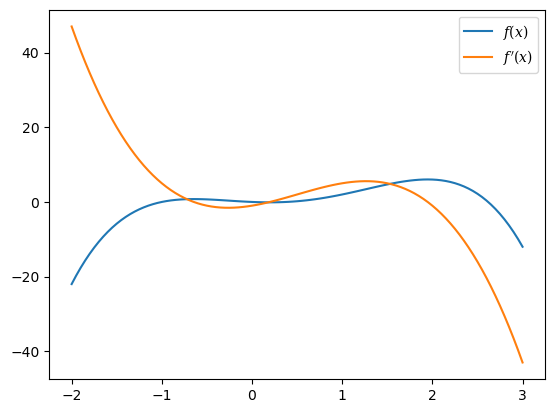

In [2]:
# Add your solution here
plt.rcParams["mathtext.fontset"] = "dejavuserif"
x = np.linspace(-2, 3, 101)
plt.plot(x, f(x), label=r'$f(x)$')
plt.plot(x, df(x), label=r"$f'(x)$")
plt.legend()
plt.show()

#### b. Maximize using gradient ascent. You can try step size 0.1 and start somewhere in the range $[-2, 3]$. 

Gradient ascent: $x_{(k+1)} = x_{(k)} + \gamma \nabla f(x_{(k)})$

Done at 14 iterations


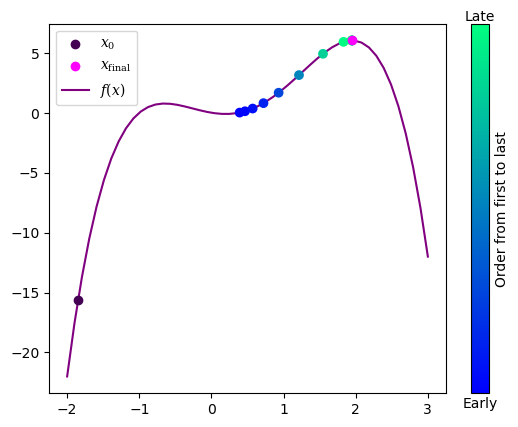

In [3]:
# Add your solution here
n = 100
np.random.seed(42069)

x0 = 5*np.random.rand() - 2 # [-2, 3]
x = [x0]
γ = 0.06
tol = 1e-12

for k in range(n-1):
    x.append(x[k] + γ*df(x[k]))
    if abs(f(x[k+1]) - f(x[k])) < tol:
        print(f'Done at {k+1} iterations')
        break
    
x_axis = np.linspace(-2, 3)
color = f(x)
plt.scatter(x[1:-1], f(x[1:-1]), c=color[1:-1], cmap='winter', zorder=3)
c = plt.colorbar(label='Order from first to last', ticks=[])
c.ax.text(0.5, -0.01, 'Early', transform=c.ax.transAxes, 
    va='top', ha='center')
c.ax.text(0.5, 1.0, 'Late', transform=c.ax.transAxes, 
    va='bottom', ha='center')

plt.scatter(x0, f(x0), label=r"$x_0$", c=color[0], zorder=3)
plt.scatter(x[-1], f(x[-1]), label=r'$x_{\text{final}}$', c='magenta', zorder=3)

plt.plot(x_axis, f(x_axis), label=r"$f(x)$", c='purple')

plt.legend()
plt.show()

##### How does the choice of starting point and step size affect the algorithm's performance?
The closer we are to the global maximum, the faster we get to the solution.

##### Is there a starting point where the algorithm would not even be able to find a local maximum?
If placed too close to the local maximum with too low value for $γ$, we cant get the true solution as seen below

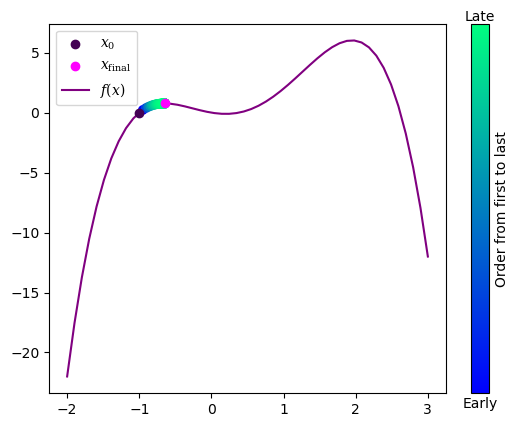

In [8]:
# Add your solution here
n = 100

x0 = -1
x = [x0]
γ = 0.01
tol = 1e-12

for k in range(n-1):
    x.append(x[k] + γ*df(x[k]))
    if abs(f(x[k+1]) - f(x[k])) < tol:
        print(f'Done at {k+1} iterations')
        break
    
x_axis = np.linspace(-2, 3)
color = f(x)
plt.scatter(x[1:-1], f(x[1:-1]), c=color[1:-1], cmap='winter', zorder=3)
c = plt.colorbar(label='Order from first to last', ticks=[])
c.ax.text(0.5, -0.01, 'Early', transform=c.ax.transAxes, 
    va='top', ha='center')
c.ax.text(0.5, 1.0, 'Late', transform=c.ax.transAxes, 
    va='bottom', ha='center')

plt.scatter(x0, f(x0), label=r"$x_0$", c=color[0], zorder=3)
plt.scatter(x[-1], f(x[-1]), label=r'$x_{\text{final}}$', c='magenta', zorder=3)

plt.plot(x_axis, f(x_axis), label=r"$f(x)$", c='purple')

plt.legend()
plt.show()

#### c. Assume that we are only interested in maxima of $f(x)$, where $-2 \leq x \leq 3$, and x increases in step length of 0.5 ($\Delta x = 0.5$). Perform an exhaustive search to maximize $f(x)$ and plot the result

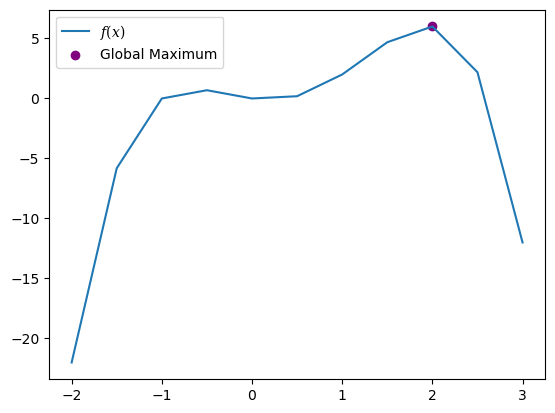

In [5]:
# Add your solution here
from time import time 
start = time()
Δx = 0.5
x = np.arange(-2, 3 + Δx, Δx)

y_max = np.max(f(x))
x_max_idx = np.where(f(x) == y_max)[0][0]
x_max = x[x_max_idx]
print(time() - start)
plt.plot(x, f(x), label=r"$f(x)$")
plt.scatter(x_max, y_max, label='Global Maximum', c='purple')
plt.legend()
plt.show()

#### d. Gradient ascent and hill climbing are quite similar, and they are based almost exclusively on exploitation. Can you think of any additions to these algorithms in order to do more exploration?

- Add more momentum with higher $γ$

#### e. Which algorithm do you think is the most efficient at maximizing $f(x)$ under the conditions in Problem **c**; exhaustive search or simulated annealing?

- Exhaustive search has $\mathcal{O}(n)$
- Simulated annealing has $\mathcal{O}(1)$
- Simulated annealing is the best